In [ ]:
##pip install yahoo_fin
##pip install yahoo_fin --upgrade
##pip install requests_html

In [1]:
from yahoo_fin.stock_info import get_data

In [2]:
import pandas as pd
import numpy as np

In [ ]:
#downloaded from https://finance.yahoo.com/quote/AMZN/history?period1=863654400&period2=1660348800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

#file_path = "AMZN.csv"
#csv_df = pd.read_csv(file_path) #,index_col = 0
#csv_df

In [ ]:
#interval: {“1d”, “1wk”, “1mo”}. Refers to the interval to sample the data: “1d”= daily, “1wk”= weekly, “1mo”=monthly.

In [3]:
api_df= get_data("amzn", start_date="05/14/1997", end_date="07/05/2022", index_as_date = False, interval="1wk")
api_df

,date,open,high,low,close,adjclose,volume,ticker
0,1997-05-12,0.121875,0.125000,0.085417,0.086458,0.086458,1.737120e+09,AMZN
1,1997-05-19,0.088021,0.088542,0.065625,0.075000,0.075000,1.162824e+09,AMZN
2,1997-05-26,0.075521,0.082292,0.072917,0.075000,0.075000,3.867840e+08,AMZN
3,1997-06-02,0.075521,0.085417,0.068750,0.082813,0.082813,3.666960e+08,AMZN
4,1997-06-09,0.082813,0.085417,0.076563,0.079167,0.079167,2.264880e+08,AMZN
...,...,...,...,...,...,...,...,...
1308,2022-06-06,125.250000,128.990005,109.050003,109.650002,109.650002,4.396481e+08,AMZN
1309,2022-06-13,104.190002,109.059998,101.430000,106.220001,106.220001,4.359760e+08,AMZN
1310,2022-06-20,108.199997,116.709999,103.559998,116.459999,116.459999,2.651542e+08,AMZN
1311,2022-06-27,117.089996,117.980003,102.519997,109.559998,109.559998,3.741520e+08,AMZN


In [ ]:
# use the close value and the date

In [ ]:
#df = csv_df[['Date', 'Close']]
#df

In [4]:
df = api_df[['date', 'close']]
df

,date,close
0,1997-05-12,0.086458
1,1997-05-19,0.075000
2,1997-05-26,0.075000
3,1997-06-02,0.082813
4,1997-06-09,0.079167
...,...,...
1308,2022-06-06,109.650002
1309,2022-06-13,106.220001
1310,2022-06-20,116.459999
1311,2022-06-27,109.559998


In [5]:
#dates are in datetime confirmation
df['date']

0      1997-05-12
1      1997-05-19
2      1997-05-26
3      1997-06-02
4      1997-06-09
          ...    
1308   2022-06-06
1309   2022-06-13
1310   2022-06-20
1311   2022-06-27
1312   2022-07-04
Name: date, Length: 1313, dtype: datetime64[ns]

In [6]:
datetime_to_str = df['date'].astype(str)
datetime_to_str

0       1997-05-12
1       1997-05-19
2       1997-05-26
3       1997-06-02
4       1997-06-09
           ...    
1308    2022-06-06
1309    2022-06-13
1310    2022-06-20
1311    2022-06-27
1312    2022-07-04
Name: date, Length: 1313, dtype: object

In [7]:
new_df_date = pd.DataFrame(datetime_to_str)
new_df_date['date']

0       1997-05-12
1       1997-05-19
2       1997-05-26
3       1997-06-02
4       1997-06-09
           ...    
1308    2022-06-06
1309    2022-06-13
1310    2022-06-20
1311    2022-06-27
1312    2022-07-04
Name: date, Length: 1313, dtype: object

In [8]:
close_n = df['close']

new_df_close = pd.DataFrame(close_n)
new_df_close['close']

0         0.086458
1         0.075000
2         0.075000
3         0.082813
4         0.079167
           ...    
1308    109.650002
1309    106.220001
1310    116.459999
1311    109.559998
1312           NaN
Name: close, Length: 1313, dtype: float64

In [9]:
frames = [new_df_date, new_df_close]
  
df = pd.concat(frames, axis=1, join= 'inner')
display(df)

,date,close
0,1997-05-12,0.086458
1,1997-05-19,0.075000
2,1997-05-26,0.075000
3,1997-06-02,0.082813
4,1997-06-09,0.079167
...,...,...
1308,2022-06-06,109.650002
1309,2022-06-13,106.220001
1310,2022-06-20,116.459999
1311,2022-06-27,109.559998


In [10]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

In [12]:
datetime_object = str_to_datetime('1997-05-12')
datetime_object

datetime.datetime(1997, 5, 12, 0, 0)

In [13]:
#apply function to column 'date' to conver to integers
df['date'] = df['date'].apply(str_to_datetime)
df['date']

0      1997-05-12
1      1997-05-19
2      1997-05-26
3      1997-06-02
4      1997-06-09
          ...    
1308   2022-06-06
1309   2022-06-13
1310   2022-06-20
1311   2022-06-27
1312   2022-07-04
Name: date, Length: 1313, dtype: datetime64[ns]

In [14]:
#remove index column
df.index = df.pop('date')
df

,close
date,
1997-05-12,0.086458
1997-05-19,0.075000
1997-05-26,0.075000
1997-06-02,0.082813
1997-06-09,0.079167
...,...
2022-06-06,109.650002
2022-06-13,106.220001
2022-06-20,116.459999


In [15]:
import matplotlib.pyplot as plt

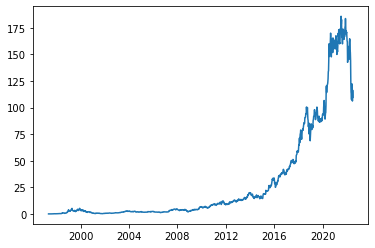

In [16]:
plt.plot(df.index , df['close'])

In [17]:
#create a supervised learning problem  LSTM(long short term memory) model



import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '1997-05-20'
windowed_df = df_to_windowed_df(df, 
                                '1997-06-02', 
                                '2022-07-04', 
                                n=3)
windowed_df.head()

,Target Date,Target-3,Target-2,Target-1,Target
0,1997-06-02,0.086458,0.075000,0.075000,0.082813
1,1997-06-09,0.075000,0.075000,0.082813,0.079167
2,1997-06-16,0.075000,0.082813,0.079167,0.076302
3,1997-06-23,0.082813,0.079167,0.076302,0.074479
4,1997-06-30,0.079167,0.076302,0.074479,0.095573


In [18]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0]
    
    middle_matrix = df_as_np[:, 1:-1]
    X= middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    
    Y= df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y= windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

## 3 steps in the past for 1 type of variable

((1310,), (1310, 3, 1), (1310,))

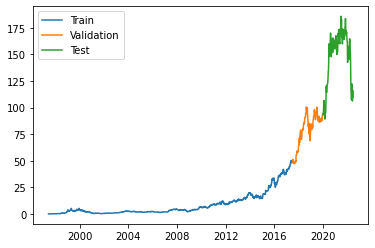

In [19]:
#train 14.07m

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [20]:
#create and train the model  Tesnsor flow

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
###  (3days in the past) 3 inputs and 1 feature(close), 64 neurons , relu,  
## mse = mean squared error
## 100 runs

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
33/33 [==============================] - 8s 58ms/step - loss: 156.7044 - mean_absolute_error: 7.0651 - val_loss: 5863.3901 - val_mean_absolute_error: 74.9492
Epoch 2/100
33/33 [==============================] - 0s 8ms/step - loss: 75.0277 - mean_absolute_error: 4.6172 - val_loss: 4130.0938 - val_mean_absolute_error: 62.0962
Epoch 3/100
33/33 [==============================] - 0s 9ms/step - loss: 14.4893 - mean_absolute_error: 1.5958 - val_loss: 1936.2590 - val_mean_absolute_error: 41.0447
Epoch 4/100
33/33 [==============================] - 0s 9ms/step - loss: 1.0714 - mean_absolute_error: 0.5190 - val_loss: 1308.0361 - val_mean_absolute_error: 32.8044
Epoch 5/100
33/33 [==============================] - 0s 10ms/step - loss: 0.4417 - mean_absolute_error: 0.3752 - val_loss: 1200.6337 - val_mean_absolute_error: 31.1936
Epoch 6/100
33/33 [==============================] - 0s 8ms/step - loss: 0.3704 - mean_absolute_error: 0.3401 - val_loss: 1140.8790 - val_mean_absolute_error: 

Epoch 50/100
33/33 [==============================] - 0s 7ms/step - loss: 0.2608 - mean_absolute_error: 0.3039 - val_loss: 844.7740 - val_mean_absolute_error: 25.4819
Epoch 51/100
33/33 [==============================] - 0s 7ms/step - loss: 0.2878 - mean_absolute_error: 0.3171 - val_loss: 845.1058 - val_mean_absolute_error: 25.4946
Epoch 52/100
33/33 [==============================] - 0s 7ms/step - loss: 0.2980 - mean_absolute_error: 0.3212 - val_loss: 833.0557 - val_mean_absolute_error: 25.2732
Epoch 53/100
33/33 [==============================] - 0s 7ms/step - loss: 0.2812 - mean_absolute_error: 0.3076 - val_loss: 835.6005 - val_mean_absolute_error: 25.3137
Epoch 54/100
33/33 [==============================] - 0s 8ms/step - loss: 0.2769 - mean_absolute_error: 0.3093 - val_loss: 833.3580 - val_mean_absolute_error: 25.2744
Epoch 55/100
33/33 [==============================] - 0s 7ms/step - loss: 0.2985 - mean_absolute_error: 0.3190 - val_loss: 840.5892 - val_mean_absolute_error: 25.395

 1/33 [..............................] - ETA: 0s - loss: 0.0902 - mean_absolute_error: 0.1853

In [ ]:
import neptune.new as neptune
import os

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from datetime import date
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential, Model
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate

import tensorflow as tf 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt